In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [17]:
from tensorflow.keras.datasets import mnist

In [29]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

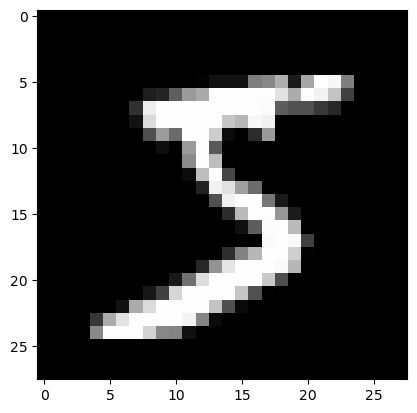

In [32]:
plt.imshow(X_train[0],cmap='gray')

In [33]:
X_train = X_train.reshape(-1,28*28)  #X_train.shape = (60000,784)
X_test = X_test.reshape(-1,28*28)
#-1 là để cho python tự tính số phù hợp

In [34]:
X_train.shape


(60000, 784)

In [23]:
# Ép kiểu
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Rescale
X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

#### Sử dụng mạng DNN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

In [13]:
# Reset
K.clear_session()
# Tạo model
model = Sequential()
model.add(Dense(512, input_dim=28*28,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation= 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(X_train.shape)
print(y_train_cat.shape)

(60000, 784)
(60000, 10)


### Training

In [14]:
h= model.fit(X_train,y_train_cat,batch_size=120,epochs=10,verbose=1,validation_split=0.3)

Epoch 1/10
350/350 [==============================] - 13s 24ms/step - loss: 0.3146 - accuracy: 0.9042 - val_loss: 0.1387 - val_accuracy: 0.9591
Epoch 2/10
350/350 [==============================] - 4s 12ms/step - loss: 0.1088 - accuracy: 0.9670 - val_loss: 0.1356 - val_accuracy: 0.9599
Epoch 3/10
350/350 [==============================] - 6s 18ms/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.1274 - val_accuracy: 0.9657
Epoch 4/10
350/350 [==============================] - 5s 14ms/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.1088 - val_accuracy: 0.9713
Epoch 5/10
350/350 [==============================] - 5s 14ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.1179 - val_accuracy: 0.9727
Epoch 6/10
350/350 [==============================] - 7s 20ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.1280 - val_accuracy: 0.9727
Epoch 7/10
350/350 [==============================] - 7s 21ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.1221 - val_accuracy: 0.975

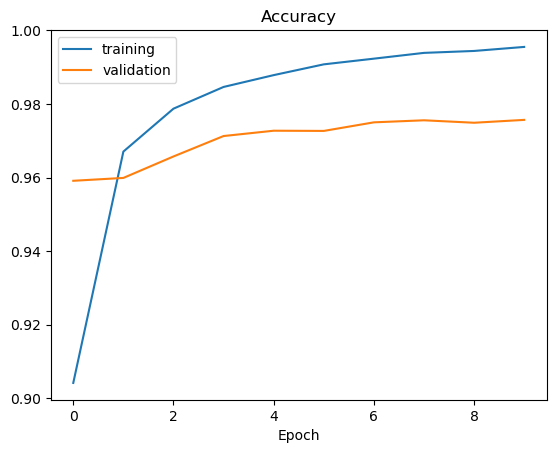

In [16]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('Epoch');

#### Evaluation

In [20]:
test_accuracy=model.evaluate(X_test,y_test_cat)[1]
test_accuracy

313/313 [==============================] - 3s 11ms/step - loss: 0.1227 - accuracy: 0.9807


0.9807000160217285

### Sử dụng Convolutional neural networks

In [24]:
X_train =X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [22]:
from tensorflow.keras.layers import Flatten,Activation,MaxPool2D,Conv2D

### Tạo Model CNN

In [33]:
#Reset
K.clear_session()
#Tạo model
model = Sequential()
# Thêm các layers
model.add( Conv2D ( 32,(3,3),activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Training

In [34]:
model.fit(X_train,y_train_cat,batch_size=120,epochs=5,validation_split=0.3)


Epoch 1/5
350/350 [==============================] - 14s 24ms/step - loss: 0.2254 - accuracy: 0.9304 - val_loss: 0.0876 - val_accuracy: 0.9732
Epoch 2/5
350/350 [==============================] - 6s 18ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 3/5
350/350 [==============================] - 7s 19ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0500 - val_accuracy: 0.9848
Epoch 4/5
350/350 [==============================] - 8s 23ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0517 - val_accuracy: 0.9856
Epoch 5/5
350/350 [==============================] - 6s 18ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0468 - val_accuracy: 0.9874


### Evaluation

In [35]:
test_accuracy=model.evaluate(X_test,y_test_cat)[1]
test_accuracy

313/313 [==============================] - 2s 7ms/step - loss: 0.0337 - accuracy: 0.9902


0.9901999831199646